<a href="https://colab.research.google.com/github/tarakantaacharya/Stock_Movement_Analysis/blob/main/Preparing_Dataset_ModelBuilding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Dataset for Model Building

#####Instructions :
1. You should run the Data Scrapping, Data_Preprocessing_Cleaning and Feature Engineering files before Model Building for required data...
2. Load the required datasets if you dont want to rebuild the datatset...
3. Installl the required libraries from requirements.txt

In [ ]:
balanced_data = pd.read_csv('balanced_reddit_data.csv')   #Convert the balanced_data into csv file

In [ ]:
balanced_data.head()    #Gives the top 5 rows of balanced_data dataframe

,subreddit,title,content,score,num_comments,url,created_utc,upvote_ratio,author,cleaned_title,...,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Price_Change,3d_MA,7d_MA,Prev_Price_Change,stock_direction
0,financialindependence,"28M, single, cross $100k net worth this year. ...","*crossed, I proofread my entire post but forgo...",5156,462,https://www.reddit.com/r/financialindependence...,2017-10-04 00:34:19,0.84,FIthrow222,single cross k net worth year college degree n...,...,38.369999,38.465000,38.115002,38.407501,80655200,-0.268969,48.057499,69.900357,-0.015521,0
1,FinTech,Career pathways in financial technology for a ...,My understanding is that not all “fintechs” ar...,7,4,https://www.reddit.com/r/fintech/comments/gju5...,2020-05-14 20:17:53,0.82,root91,career pathway financial technology financeacc...,...,77.385002,77.447502,75.382500,76.127502,158929200,-0.198270,89.572500,101.782143,0.018062,0
2,FinTech,Seeking Recommendations for Market Data Provi...,I have worked at a large investment bank for 9...,7,5,https://www.reddit.com/r/fintech/comments/1dj4...,2024-06-18 23:06:19,0.90,Fabulous_Age1899,seeking recommendation market data provider st...,...,214.289993,218.630005,213.000000,217.589996,79943300,-0.029572,222.986669,176.622144,-0.055719,0
3,investing,WSB traders uses Robinhood Margin exploit to b...,https://www.reddit.com/r/wallstreetbets/commen...,2741,463,https://www.reddit.com/r/investing/comments/dr...,2019-11-05 09:36:13,0.97,DanzoFriend,wsb trader us robinhood margin exploit buy pos...,...,64.282501,64.547501,64.080002,64.262497,79897600,0.487074,62.439168,89.116071,-0.458353,1
4,options,The Ultimate Guide to Selling Options Profitab...,# Here's what makes option selling profitable ...,1666,286,https://www.reddit.com/r/options/comments/pxe1...,2021-09-28 19:38:14,0.98,AlphaGiveth,ultimate guide selling option profitability re...,...,141.910004,144.750000,141.690002,143.250000,108972300,0.088601,130.800001,130.222858,0.085158,1


In [ ]:
balanced_data.shape    # Gives the shape of balanced_data dataframe

(7504, 39)

balanced_data dataframe has 7504 rows and 39 columns...

In [ ]:
balanced_data.columns   #The columns present in balanced_data dataframe

Index(['subreddit', 'title', 'content', 'score', 'num_comments', 'url',
       'created_utc', 'upvote_ratio', 'author', 'cleaned_title',
       'cleaned_content', 'title_sentiment', 'content_sentiment',
       'title_sentiment_class', 'content_sentiment_class', 'title_word_count',
       'content_word_count', 'title_char_count', 'content_char_count',
       'title_avg_word_length', 'content_avg_word_length',
       'title_sentiment_score', 'content_sentiment_score',
       'title_sentiment_numeric', 'content_sentiment_numeric', 'time_date',
       'date', 'Date', 'Adj Close_AAPL', 'Close_AAPL', 'High_AAPL', 'Low_AAPL',
       'Open_AAPL', 'Volume_AAPL', 'Price_Change', '3d_MA', '7d_MA',
       'Prev_Price_Change', 'stock_direction'],
      dtype='object')

In [ ]:
for i in balanced_data.columns :
    print(i,":",balanced_data[i].dtype)    #printing the column and its respective datatype

subreddit : object
title : object
content : object
score : int64
num_comments : int64
url : object
created_utc : object
upvote_ratio : float64
author : object
cleaned_title : object
cleaned_content : object
title_sentiment : float64
content_sentiment : float64
title_sentiment_class : object
content_sentiment_class : object
title_word_count : int64
content_word_count : int64
title_char_count : int64
content_char_count : int64
title_avg_word_length : float64
content_avg_word_length : float64
title_sentiment_score : float64
content_sentiment_score : float64
title_sentiment_numeric : int64
content_sentiment_numeric : int64
time_date : object
date : object
Date : object
Adj Close_AAPL : float64
Close_AAPL : float64
High_AAPL : float64
Low_AAPL : float64
Open_AAPL : float64
Volume_AAPL : int64
Price_Change : float64
3d_MA : float64
7d_MA : float64
Prev_Price_Change : float64
stock_direction : int64


In [ ]:
model_df = balanced_data[['score','num_comments','upvote_ratio','title_sentiment_score','content_sentiment_score','title_sentiment_class',
'content_sentiment_class','Close_AAPL','High_AAPL','Low_AAPL','Open_AAPL','Price_Change','Prev_Price_Change','stock_direction','date']]
# We took out the those columns which are necessary to  build our model

In [ ]:
model_df.shape   #Now the dataframe reduced to 15 columns instead of 39 columns

(7504, 15)

In [ ]:
model_df    # printing the dataframe rows

,score,num_comments,upvote_ratio,title_sentiment_score,content_sentiment_score,title_sentiment_class,content_sentiment_class,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Price_Change,Prev_Price_Change,stock_direction,date
0,5156,462,0.84,-0.074286,0.130627,Neutral,Positive,38.369999,38.465000,38.115002,38.407501,-0.268969,-0.015521,0,2017-10-04
1,7,4,0.82,0.004167,-0.002381,Neutral,Neutral,77.385002,77.447502,75.382500,76.127502,-0.198270,0.018062,0,2020-05-14
2,7,5,0.90,0.000000,0.144524,Neutral,Positive,214.289993,218.630005,213.000000,217.589996,-0.029572,-0.055719,0,2024-06-18
3,2741,463,0.97,0.000000,0.000000,Neutral,Neutral,64.282501,64.547501,64.080002,64.262497,0.487074,-0.458353,1,2019-11-05
4,1666,286,0.98,-0.150000,0.091652,Negative,Neutral,141.910004,144.750000,141.690002,143.250000,0.088601,0.085158,1,2021-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7499,8,2,0.83,0.000000,0.212000,Neutral,Positive,46.465000,47.674999,46.247501,47.500000,0.087282,-0.022474,1,2018-11-19
7500,4407,259,0.96,0.278788,0.062568,Positive,Neutral,164.850006,165.119995,160.869995,163.839996,0.132212,-0.149235,1,2022-02-25
7501,192,93,0.90,0.150000,0.089911,Positive,Neutral,43.752499,43.855000,43.625000,43.669998,0.118346,-0.686242,1,2017-12-22
7502,549,293,0.95,-0.092641,-0.331818,Neutral,Negative,97.057503,97.254997,93.877502,94.839996,-0.224285,-0.060590,0,2020-07-14


In [ ]:
model_df.to_csv('model_data.csv', index=False)    #Saving the model_df into csv file for further use

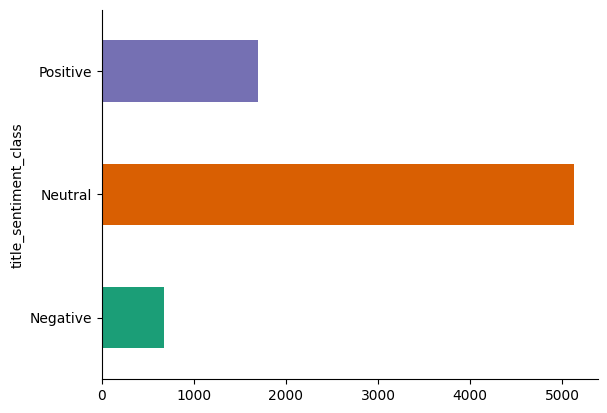

In [ ]:
# Plotting to know the relationship between title_sentiment_class and its count
# Neutral Class has more count rather than all classes
model_df.groupby('title_sentiment_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
model_df.columns    # Printing the columns of model_data

Index(['score', 'num_comments', 'upvote_ratio', 'title_sentiment_score',
       'content_sentiment_score', 'title_sentiment_class',
       'content_sentiment_class', 'Close_AAPL', 'High_AAPL', 'Low_AAPL',
       'Open_AAPL', 'Price_Change', 'Prev_Price_Change', 'stock_direction',
       'date'],
      dtype='object')